In [68]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from torch.utils.data import TensorDataset, DataLoader, random_split
from torchvision.utils import make_grid

In [69]:
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [70]:
from sklearn.metrics import confusion_matrix

In [71]:
transform = transforms.ToTensor()

In [72]:
train_data = datasets.MNIST(root = '/home/maxime3343/Documents/Jupyter NoteBook/Image Datasets', train = True, download=True, transform=transform)

In [91]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: /home/maxime3343/Documents/Jupyter NoteBook/Image Datasets
    Split: Train
    StandardTransform
Transform: ToTensor()

In [73]:
test_data = datasets.MNIST(root='/home/maxime3343/Documents/Jupyter NoteBook/Image Datasets',train = False, download = True, transform=transform)

In [92]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: /home/maxime3343/Documents/Jupyter NoteBook/Image Datasets
    Split: Test
    StandardTransform
Transform: ToTensor()

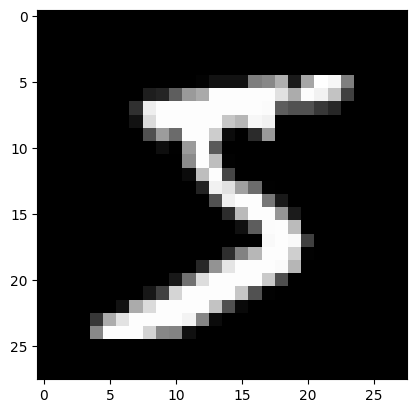

In [106]:
image, label = train_data[0]
plt.imshow(image.reshape(28,28), cmap='gray')

In [76]:
train_loader = DataLoader(train_data, batch_size = 100, shuffle = True)
test_loader = DataLoader(test_data, batch_size=500, shuffle = True)
# Create batches out of our training and test datasets

In [77]:
for images, labels in train_loader:
    break
images.shape
# We have taken the first batch only
# Why is it usable outside of the for loop?

torch.Size([100, 1, 28, 28])

In [78]:
im = make_grid(images[:12], nrow=12)

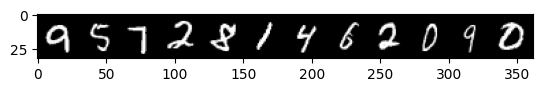

In [79]:
plt.imshow(np.transpose(im.numpy(), (1,2,0)))

In [80]:
# First way to create a Neural Network.

class Model(nn.Module):
    
    def __init__(self,in_features = 784, out_features=10, layers=[120,84]):
        super().__init__()
        self.fc1 = nn.Linear(in_features, layers[0])
        self.fc2 = nn.Linear(layers[0], layers[1])
        self.fc3 = nn.Linear(layers[1], out_features)
        
    # Returns unnormalized logits bc of log_softmax.
    def forward(self, X):
        #Linear then Activation Function.
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = F.log_softmax(self.fc3(X), dim=1)
        
        # Returns a single floating point value.
        
        #X = F.log_softmax(self.fc3(X), dim = 1)
        # Returns index of max value within output of log_softmax.
        #X = torch.argmax(X, 1).type(torch.FloatTensor)
        return X

In [60]:
# Second way to create a Neural Network.

#model = nn.Sequential(
#    nn.Linear(784,120),
 #   nn.ReLU(),
 #   nn.Linear(120,84),
 #   nn.ReLU(),
 #   nn.Linear(84,10),
 #   nn.LogSoftmax(dim = 1)
#)

In [81]:
model = Model()

In [82]:
model

Model(
  (fc1): Linear(in_features=784, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [83]:
learning_rate = 0.001

In [84]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [85]:
epochs = 10

In [86]:
# Training with Training Dataset.

import time
start_time = time.time()

#Trackers.
train_losses = []
test_losses = []
correct_number = 0

losses = []

for i in range(epochs):
    
    # b is the count since we are using Python Enumerate, batch count to be more specific.
    # (X_train, y_train) is a tuple we are getting back from the train_loader.
    # Image and its label returned as a tuple.
    for b, (X_train, y_train) in enumerate(train_loader):
        b += 1 #Start the count at 1, and not 0
        
        # Every image sample is flattened.
        # Flattens out X_train to [100, 784].
        # Returns 10 unnormalized logits.
        y_pred = model(X_train.view(100,-1)) 
        
        # Requires unnormalized logits, with a label encoding.
        trn_loss = criterion(y_pred, y_train)

        # Performing Backpropagation
        optimizer.zero_grad()
        trn_loss.backward()
        optimizer.step()
        
        # Print out the results.
        if b%200 == 0:
            # Accuracy, which is the average number of correct per batch
            #acc = (trn_corr*100)/(b*100) # No item required as already an int.
            print(f'Epoch {i} batch:{b} loss:{trn_loss.item()}')
            
    # Test Dataset as we training the data.
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader):
            y_val = model(X_test.view(500,-1))
            tst_loss = criterion(y_val, y_test)
        
    # We append to both Losses Lists, so they have same number to be plotted out.
    train_losses.append(trn_loss)
    test_losses.append(tst_loss)
        
    # Shows which number the model thinks the image is.
    prediction = torch.argmax(y_val, dim=1)
    correct_number += (prediction==y_test).sum()
         
    
# Prints out total duration of training.    
print(f'Total time taken by training: {time.time()-start_time} seconds.')

Epoch 0 batch:200 loss:0.35047972202301025
Epoch 0 batch:400 loss:0.20801374316215515
Epoch 0 batch:600 loss:0.30364829301834106
Epoch 1 batch:200 loss:0.16663120687007904
Epoch 1 batch:400 loss:0.19569729268550873
Epoch 1 batch:600 loss:0.16338682174682617
Epoch 2 batch:200 loss:0.18400275707244873
Epoch 2 batch:400 loss:0.13495512306690216
Epoch 2 batch:600 loss:0.08136535435914993
Epoch 3 batch:200 loss:0.11595814675092697
Epoch 3 batch:400 loss:0.08770441263914108
Epoch 3 batch:600 loss:0.039307523518800735
Epoch 4 batch:200 loss:0.1104326844215393
Epoch 4 batch:400 loss:0.09294156730175018
Epoch 4 batch:600 loss:0.03783838823437691
Epoch 5 batch:200 loss:0.09185132384300232
Epoch 5 batch:400 loss:0.0646958127617836
Epoch 5 batch:600 loss:0.03674071654677391
Epoch 6 batch:200 loss:0.047082334756851196
Epoch 6 batch:400 loss:0.01739180088043213
Epoch 6 batch:600 loss:0.026477742940187454
Epoch 7 batch:200 loss:0.042495936155319214
Epoch 7 batch:400 loss:0.02165483869612217
Epoch 7 b

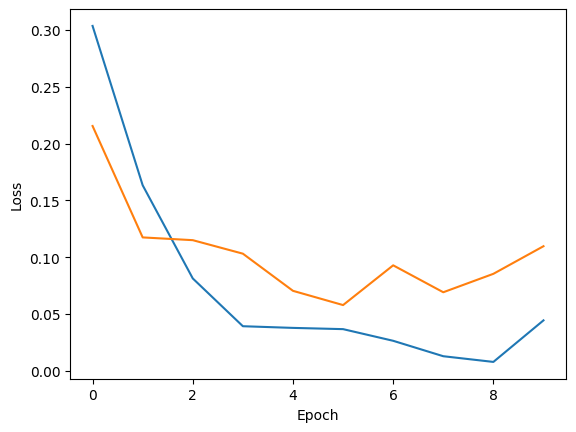

In [87]:
# Plots out the Loss Function.

# Epochs = 10.
with torch.no_grad():
    plt.plot(range(epochs), train_losses)
    plt.plot(range(epochs), test_losses)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')

In [105]:
# Evaluation of the model.

# Tracker.
correct_number = 0

with torch.no_grad():
    for b, (X_test, y_test) in enumerate(test_loader):
        # View used because image is flatten out.
        y_val = model(X_test.view(500,-1))
        loss = criterion(y_val, y_test)
    
        prediction = torch.argmax(y_val, dim=1)
        correct_number += (prediction==y_test).sum()
        
print(f'{correct_number} numbers out of 10000 were guessed right by the Model. Gives out an accuracy of {(correct_number/10000) * 100}%')

9762 numbers out of 10000 were guessed right by the Model. Gives out an accuracy of 97.6199951171875%
